Tools (Arxiv, wikipedia, Tavily)

In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("Attention is all you need")

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifi'

wikipedia

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=5000)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki,description="query wikipedia articles")

In [5]:
wiki.invoke("Artificial Intelligence")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into gener

call the api key

In [6]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


Create tavily tool for internet search

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily=TavilySearchResults()

C:\Users\joshi\AppData\Local\Temp\ipykernel_8760\3880125110.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


In [8]:
tavily.invoke("What is the latest research on large language models?")

[{'title': 'Top 9 Large Language Models as of December 2025',
  'url': 'https://www.shakudo.io/blog/top-9-large-language-models',
  'content': 'Google continues to advance its large language model (LLM) family with the latest Gemini 2.5 series. This updated version is designed for enhanced complex problem-solving and native multimodal understanding. Gemini 2.5 Pro, Google’s most advanced model as of late March 2025, features a “Deep Think” mode that allows it to reason through complex problems step-by-step. The model is also highly capable in coding and excels in complex multimodal queries by understanding and generating text, images, [...] Google continues to advance its large language model (LLM) family with the latest Gemini 2.5 series. This updated version is designed for enhanced complex problem-solving and native multimodal understanding. Gemini 2.5 Pro, Google’s most advanced model as of late March 2025, features a “Deep Think” mode that allows it to reason through complex probl

Combine all the tools in one list

In [9]:
tools=[arxiv,wiki,tavily]

initialize llm model use groq

In [10]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")

In [11]:
llm.invoke("What is ai")

AIMessage(content='Artificial intelligence (AI) is a broad field of computer science that focuses on creating intelligent machines that can perform tasks that typically require human intelligence. AI involves the development of algorithms, statistical models, and computer programs that enable machines to perceive, reason, learn, and act like humans.\n\nThe main goals of AI are:\n\n1. **Perception**: to enable machines to interpret and understand their environment through sensors, such as vision, speech, and text.\n2. **Reasoning**: to allow machines to draw inferences and make decisions based on data and knowledge.\n3. **Learning**: to enable machines to improve their performance over time through experience and adaptation.\n4. **Action**: to enable machines to interact with their environment and take actions based on their perception, reasoning, and learning.\n\nAI can be categorized into several types:\n\n1. **Narrow or Weak AI**: designed to perform a specific task, such as image re

combining all the tools with our llm

In [12]:
llm_with_tools = llm.bind_tools(tools)

execute the call

In [13]:
llm_with_tools.invoke("What is the latest research on large language models?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xjkcv60hd', 'function': {'arguments': '{"query":"large language models 2024"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 397, 'total_tokens': 417, 'completion_time': 0.04215976, 'completion_tokens_details': None, 'prompt_time': 0.022048341, 'prompt_tokens_details': None, 'queue_time': 0.050754798, 'total_time': 0.064208101}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b8301-e0c4-7bc3-8018-a486a63edbba-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'large language models 2024'}, 'id': 'xjkcv60hd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 397, 'output_tokens': 20, 'total_tokens': 417})

In [14]:
llm_with_tools.invoke("what is ai")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '2tqxj7h4g', 'function': {'arguments': '{"query":"Artificial intelligence"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 390, 'total_tokens': 406, 'completion_time': 0.038363066, 'completion_tokens_details': None, 'prompt_time': 0.027325906, 'prompt_tokens_details': None, 'queue_time': 0.059437424, 'total_time': 0.065688972}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b8301-ed78-7dd3-9107-93b5a972500f-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Artificial intelligence'}, 'id': '2tqxj7h4g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 390, 'output_tokens': 16, 'total_tokens': 406})

start the langgraph workflow using the react architecture

In [15]:
from typing_extensions import TypedDict ##for the state schema
from langchain_core.messages import AnyMessage, HumanMessage ## human or ai message
from typing import Annotated ##labeling
from langgraph.graph.message import add_messages ##reducers in langgraph

In [16]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

create entire graph

In [17]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

make the node definition

In [18]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


#build graph
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))


#build edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",tools_condition
)
builder.add_edge("tools",END)

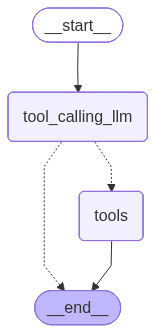

In [19]:
graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
messages=graph.invoke({"messages": [HumanMessage(content="HI")]})

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

HI
================================== Ai Message ==================================

I'm not aware of any function that matches "HI". If you have a specific task or question, I can help you find the relevant function or provide information.


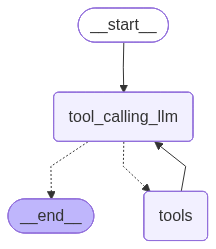

In [21]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


#build graph
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))


#build edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",tools_condition
)
builder.add_edge("tools","tool_calling_llm")
builder.add_edge("tool_calling_llm",END)
graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
messages=graph.invoke({"messages": [HumanMessage(content="HI my name is prashant. What is ai? and what is the latest research on large language models?")]})

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

HI my name is prashant. What is ai? and what is the latest research on large language models?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (29d4rgqr4)
 Call ID: 29d4rgqr4
  Args:
    query: Artificial Intelligence
  arxiv (zz4m241br)
 Call ID: zz4m241br
  Args:
    query: large language models recent research
  tavily_search_results_json (e17ht4esr)
 Call ID: e17ht4esr
  Args:
    query: latest research on large language models
================================= Tool Message =================================
Name: wikipedia

Page: Artificial intelligence
Summary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies met